In [2]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [3]:
tf.set_random_seed(777)  # reproducibility

In [4]:
mnist = input_data.read_data_sets("./MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
# parameters
learning_rate = 0.001
training_epochs = 50 #전체 데이터를 50번 학습하겠다
batch_size = 128

In [7]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [8]:
# weights & bias for nn layers
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

hypothesis = tf.matmul(X, W) + b

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
#cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [9]:
# initialize
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [10]:
vc = []

In [11]:
# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    vc.append(avg_cost)
print('Learning Finished!')

Epoch: 0001 cost = 6.452299026
Epoch: 0002 cost = 2.135692009
Epoch: 0003 cost = 1.312084724
Epoch: 0004 cost = 0.993566686
Epoch: 0005 cost = 0.830869658
Epoch: 0006 cost = 0.725916095
Epoch: 0007 cost = 0.657360496
Epoch: 0008 cost = 0.604344109
Epoch: 0009 cost = 0.565174861
Epoch: 0010 cost = 0.530786026
Epoch: 0011 cost = 0.507723710
Epoch: 0012 cost = 0.484095696
Epoch: 0013 cost = 0.461488601
Epoch: 0014 cost = 0.449357649
Epoch: 0015 cost = 0.436019538
Epoch: 0016 cost = 0.418966994
Epoch: 0017 cost = 0.410329097
Epoch: 0018 cost = 0.399405505
Epoch: 0019 cost = 0.389678342
Epoch: 0020 cost = 0.381150307
Epoch: 0021 cost = 0.375336519
Epoch: 0022 cost = 0.369129497
Epoch: 0023 cost = 0.359342340
Epoch: 0024 cost = 0.354430623
Epoch: 0025 cost = 0.347238408
Epoch: 0026 cost = 0.345840590
Epoch: 0027 cost = 0.337966747
Epoch: 0028 cost = 0.337775461
Epoch: 0029 cost = 0.327502273
Epoch: 0030 cost = 0.327015199
Epoch: 0031 cost = 0.321500754
Epoch: 0032 cost = 0.321264574
Epoch: 0

In [12]:
################################
# 정확도 확인하기
# Test model and check accuracy
pred = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
print (pred.dtype)
accuracy = tf.reduce_mean(tf.cast(pred, tf.float32))
print('Accuracy (test):', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

<dtype: 'bool'>
Accuracy (test): 0.918


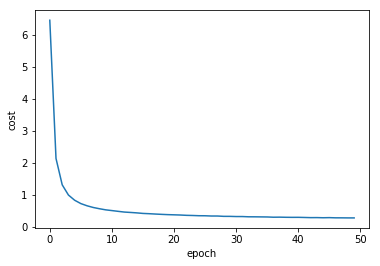

In [13]:
plt.plot(vc)
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()